In [18]:

import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [20]:
x= tf.keras.datasets.fashion_mnist.load_data()

In [24]:
import pandas as pd
df= pd.DataFrame(x)

In [25]:
df

,0,1
0,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, ..."
1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, ..."


In [15]:
y_test.shape

(10000,)

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 7 Sneaker


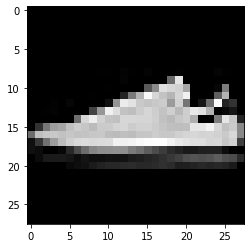

In [5]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 6
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index], cmap='gray')
plt.rcParams['image.cmap'] = 'Greys'


IndexError: list index out of range

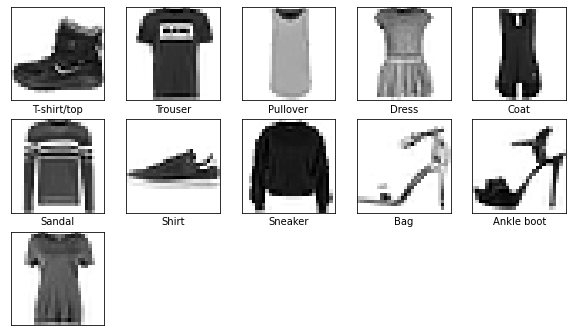

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(fashion_mnist_labels[i])
plt.show()

In [16]:
d2_train_dataset =x_train.reshape(60000,784)
d2_test_dataset =x_test.reshape(10000,784)

In [9]:
prediction.shape

(60000,)

In [8]:
y_test.shape

(10000,)

In [10]:
x_test.shape

(10000, 28, 28)

In [11]:
d2_train_dataset.shape

(60000, 784)

model:

In [17]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
RForest = RandomForestClassifier()
RForest.fit(d2_train_dataset, y_train)
prediction = RForest.predict(d2_test_dataset)
accuracy_score(y_test, prediction)

0.8754

In [ ]:
from sklearn.decomposition import PCA as RandomizedPCA


# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d ?" % (n_components, d2_train_dataset.shape[0]))
#t0 = time()
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(d2_train_dataset)
#print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components))#, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
#t0 = time()
x_train_pca = pca.transform(d2_train_dataset)
x_test_pca = pca.transform(x_test)
#print("done in %0.3fs" % (time() - t0))
 

In [5]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [6]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

In [11]:
pipe.fit(d2_train_dataset, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [ ]:
pipe.score(d2_train_dataset, y_test)
